In [7]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

# ==================================================
# DATA PATH (shared across all analysis notebooks)
# ==================================================
DATA_PATH = Path("../../03_Cleaned_Data")


In [8]:
df = pd.read_csv(
    DATA_PATH / "Dataset 1 Regional_Economic_Magnitude (CLEANED).csv"
)

def safe_mode(series: pd.Series):
    m = series.dropna().mode()
    return m.iloc[0] if len(m) else np.nan

# Get mean, median, mode, max, min, and range of GRDP by region and price type
stats = (df.groupby(["Region", "Price_Type"], as_index=False)["Total_GRDP"]
      .agg(
          Mean="mean",
          Median="median",
          Mode=safe_mode,
          Max="max",
          Min="min",
          Range=np.ptp
      ))
stats

,Region,Price_Type,Mean,Median,Mode,Max,Min,Range
0,Bangsamoro Autonomous Region in Muslim Mindanao,At Constant 2018 Prices,2.052916e+08,1.707071e+08,9.413690e+07,5.838206e+08,9.413690e+07,4.896837e+08
1,Bangsamoro Autonomous Region in Muslim Mindanao,At Current Prices,1.957093e+08,1.542183e+08,4.475136e+07,7.262102e+08,4.475136e+07,6.814588e+08
2,Bicol Region,At Constant 2018 Prices,4.176218e+08,3.346589e+08,1.763584e+08,1.220392e+09,1.763584e+08,1.044033e+09
3,Bicol Region,At Current Prices,3.965593e+08,2.982479e+08,9.685445e+07,1.402277e+09,9.685445e+07,1.305423e+09
4,CALABARZON,At Constant 2018 Prices,2.204374e+09,1.809709e+09,1.050505e+09,6.189461e+09,1.050505e+09,5.138956e+09
5,CALABARZON,At Current Prices,2.106031e+09,1.721867e+09,6.016914e+08,6.868981e+09,6.016914e+08,6.267289e+09
6,Cagayan Valley,At Constant 2018 Prices,3.212493e+08,2.648766e+08,1.582184e+08,8.939598e+08,1.582184e+08,7.357414e+08
7,Cagayan Valley,At Current Prices,3.005356e+08,2.347246e+08,8.593798e+07,1.021420e+09,8.593798e+07,9.354821e+08
8,Caraga,At Constant 2018 Prices,2.344804e+08,1.931030e+08,9.692163e+07,6.791030e+08,9.692163e+07,5.821814e+08
9,Caraga,At Current Prices,2.293833e+08,1.803940e+08,5.235771e+07,8.121238e+08,5.235771e+07,7.597661e+08


In [9]:
# Get mean GRDP by region
mean_df = stats[['Region', 'Price_Type', 'Mean']]
mean_df

,Region,Price_Type,Mean
0,Bangsamoro Autonomous Region in Muslim Mindanao,At Constant 2018 Prices,2.052916e+08
1,Bangsamoro Autonomous Region in Muslim Mindanao,At Current Prices,1.957093e+08
2,Bicol Region,At Constant 2018 Prices,4.176218e+08
3,Bicol Region,At Current Prices,3.965593e+08
4,CALABARZON,At Constant 2018 Prices,2.204374e+09
5,CALABARZON,At Current Prices,2.106031e+09
6,Cagayan Valley,At Constant 2018 Prices,3.212493e+08
7,Cagayan Valley,At Current Prices,3.005356e+08
8,Caraga,At Constant 2018 Prices,2.344804e+08
9,Caraga,At Current Prices,2.293833e+08


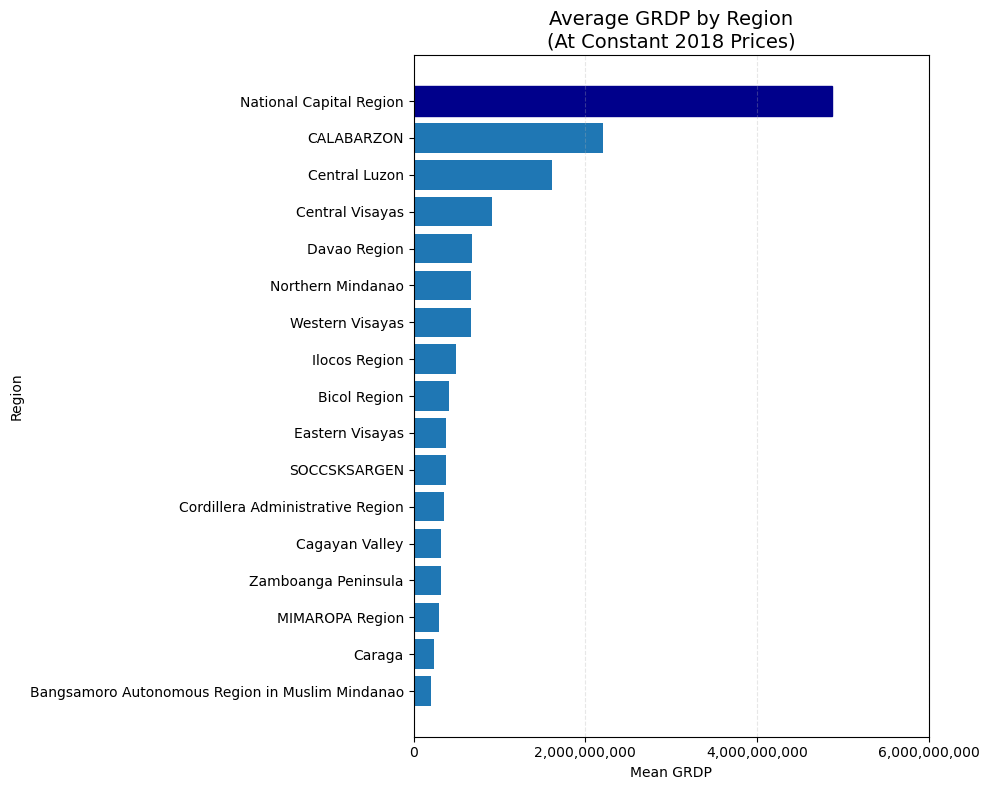

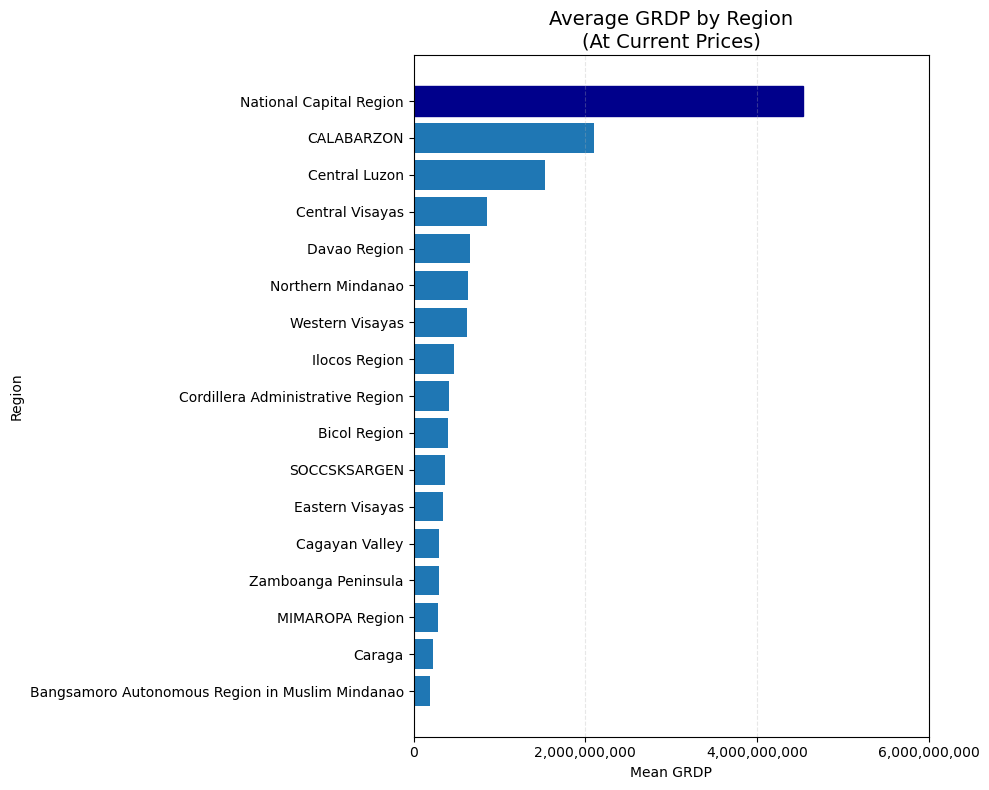

In [12]:

def show_region_bar_chart(title, xlabel, df, grdp_col, xlim):
    plt.figure(figsize=(10, 8))
    bars = plt.barh(df["Region"], df[grdp_col])

    # Highlight top region
    bars[-1].set_color("darkblue")

    # Format numbers (no scientific notation)
    plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

    # Define x axis intervals
    plt.xlim(0, xlim)
    plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(2e+9))

    plt.title(title, fontsize=14)
    plt.xlabel(xlabel)
    plt.ylabel("Region")

    plt.grid(axis="x", linestyle="--", alpha=0.3)

    plt.tight_layout()
    plt.show()

def get_mean_data(price_type):
    # Filter by price type
    mean_data = mean_df[mean_df["Price_Type"] == price_type].copy()

    # Ascending for horizontal bars
    mean_data = mean_data.sort_values("Mean", ascending=True)
    return mean_data

def show_mean_data(price_type):
    # Show Mean GRDP by Region for a Given Price Type
    title = f"Average GRDP by Region\n({price_type})"
    mean_data = get_mean_data(price_type)
    show_region_bar_chart(title, "Mean GRDP", mean_data, "Mean", 6e+9)

show_mean_data("At Constant 2018 Prices")
show_mean_data("At Current Prices")

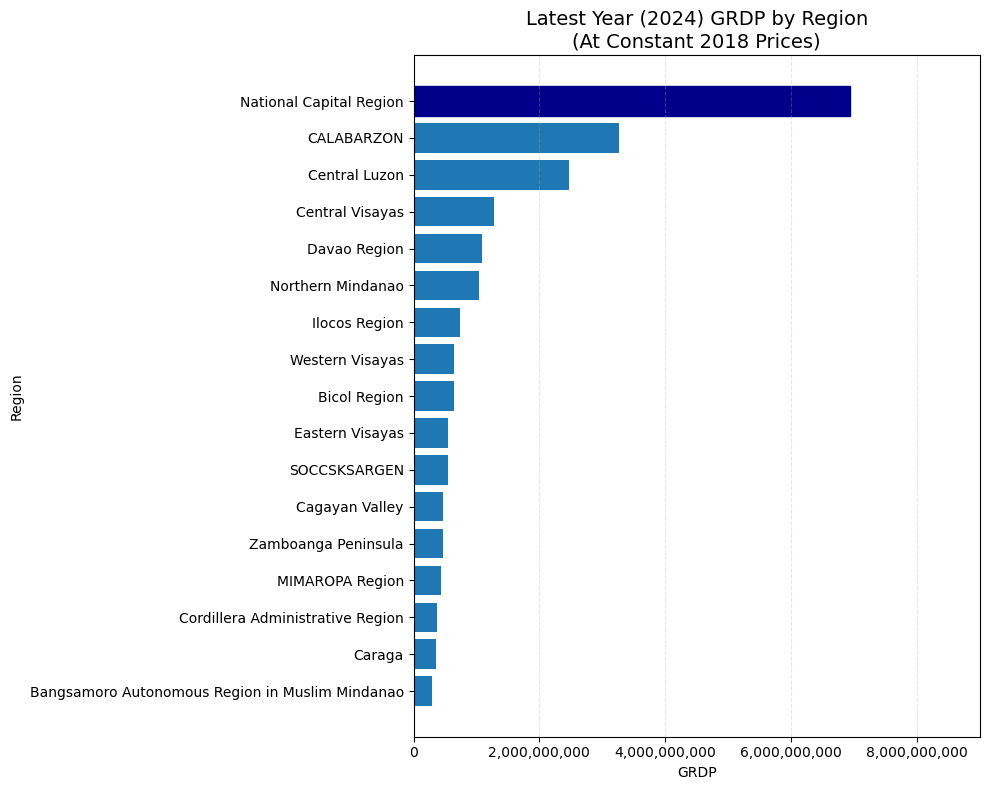

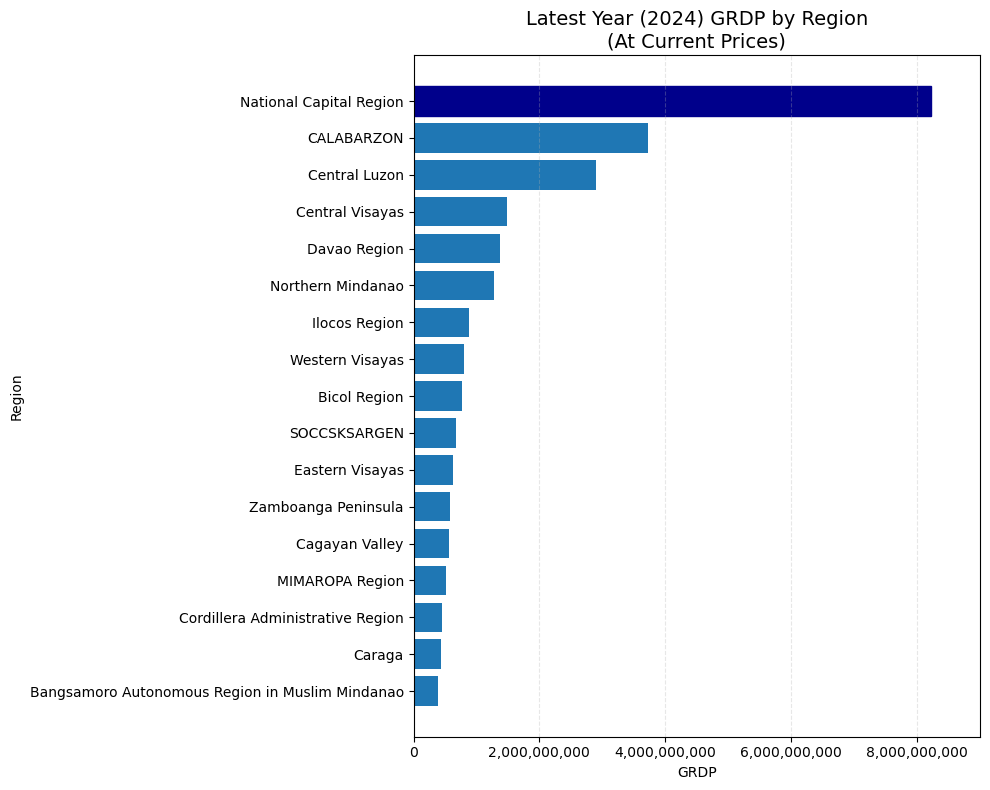

In [13]:
def get_latest_grdp(price_type):
  # Filter by price type
  latest_grdp = df[df['Year'] == 2024]
  latest_grdp = latest_grdp[latest_grdp["Price_Type"] == price_type]

  # Ascending for horizontal bars
  latest_grdp = latest_grdp.sort_values("Total_GRDP", ascending=True)
  return latest_grdp

def show_latest_grdp(price_type):
  # Show Latest GRDP by Region for a Given Price Type
  title = f"Latest Year (2024) GRDP by Region\n({price_type})"
  latest_grdp = get_latest_grdp(price_type)
  show_region_bar_chart(title, "GRDP", latest_grdp, "Total_GRDP", 9e+9)

show_latest_grdp("At Constant 2018 Prices")
show_latest_grdp("At Current Prices")

In [14]:
def get_ranking_table(df, price_type, grdp_col, grdp_label):
  table = df[['Region', 'Price_Type', grdp_col]]
  table = table[table['Price_Type'] == price_type]
  table.sort_values(grdp_col, ascending=False, inplace=True, ignore_index=True)
  table.rename(columns={grdp_col:f'{grdp_label} ({price_type})'}, inplace=True)
  table.drop(columns=['Price_Type'], inplace=True)
  table.reset_index()
  table.index = table.index + 1
  return table

# Regional GRDP ranking table (mean)
display(get_ranking_table(mean_df, 'At Constant 2018 Prices', 'Mean', 'Mean GRDP'))
display(get_ranking_table(mean_df, 'At Current Prices', 'Mean', 'Mean GRDP'))

,Region,Mean GRDP (At Constant 2018 Prices)
1,National Capital Region,4.868232e+09
2,CALABARZON,2.204374e+09
3,Central Luzon,1.614753e+09
4,Central Visayas,9.114054e+08
5,Davao Region,6.769329e+08
6,Northern Mindanao,6.702540e+08
7,Western Visayas,6.643274e+08
8,Ilocos Region,4.933484e+08
9,Bicol Region,4.176218e+08
10,Eastern Visayas,3.834625e+08


,Region,Mean GRDP (At Current Prices)
1,National Capital Region,4.527995e+09
2,CALABARZON,2.106031e+09
3,Central Luzon,1.524743e+09
4,Central Visayas,8.555060e+08
5,Davao Region,6.583388e+08
6,Northern Mindanao,6.369247e+08
7,Western Visayas,6.278832e+08
8,Ilocos Region,4.666534e+08
9,Cordillera Administrative Region,4.072205e+08
10,Bicol Region,3.965593e+08


In [15]:
# Regional GRDP ranking table (latest year)
latest_grdp = df[df['Year'] == 2024]
display(get_ranking_table(latest_grdp, 'At Constant 2018 Prices', 'Total_GRDP', '2024 GRDP'))
display(get_ranking_table(latest_grdp, 'At Current Prices', 'Total_GRDP', '2024 GRDP'))

,Region,2024 GRDP (At Constant 2018 Prices)
1,National Capital Region,6.941894e+09
2,CALABARZON,3.266385e+09
3,Central Luzon,2.467917e+09
4,Central Visayas,1.276348e+09
5,Davao Region,1.082492e+09
6,Northern Mindanao,1.043494e+09
7,Ilocos Region,7.356166e+08
8,Western Visayas,6.417637e+08
9,Bicol Region,6.400725e+08
10,Eastern Visayas,5.556245e+08


,Region,2024 GRDP (At Current Prices)
1,National Capital Region,8.214308e+09
2,CALABARZON,3.723569e+09
3,Central Luzon,2.892168e+09
4,Central Visayas,1.491366e+09
5,Davao Region,1.376651e+09
6,Northern Mindanao,1.273437e+09
7,Ilocos Region,8.773187e+08
8,Western Visayas,7.970408e+08
9,Bicol Region,7.699415e+08
10,SOCCSKSARGEN,6.756179e+08
